In [1]:
from google.colab import files
uploaded = files.upload()

Saving car.jpeg to car.jpeg


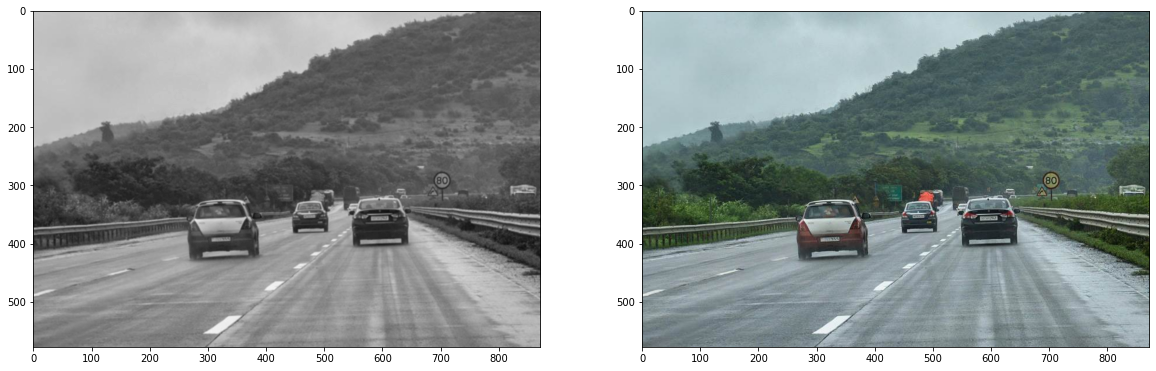

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img= cv2.imread('car.jpeg')
img_gray= cv2.imread('car.jpeg',0)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap='gray', interpolation = 'bicubic')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

([], <a list of 0 Text major ticklabel objects>)

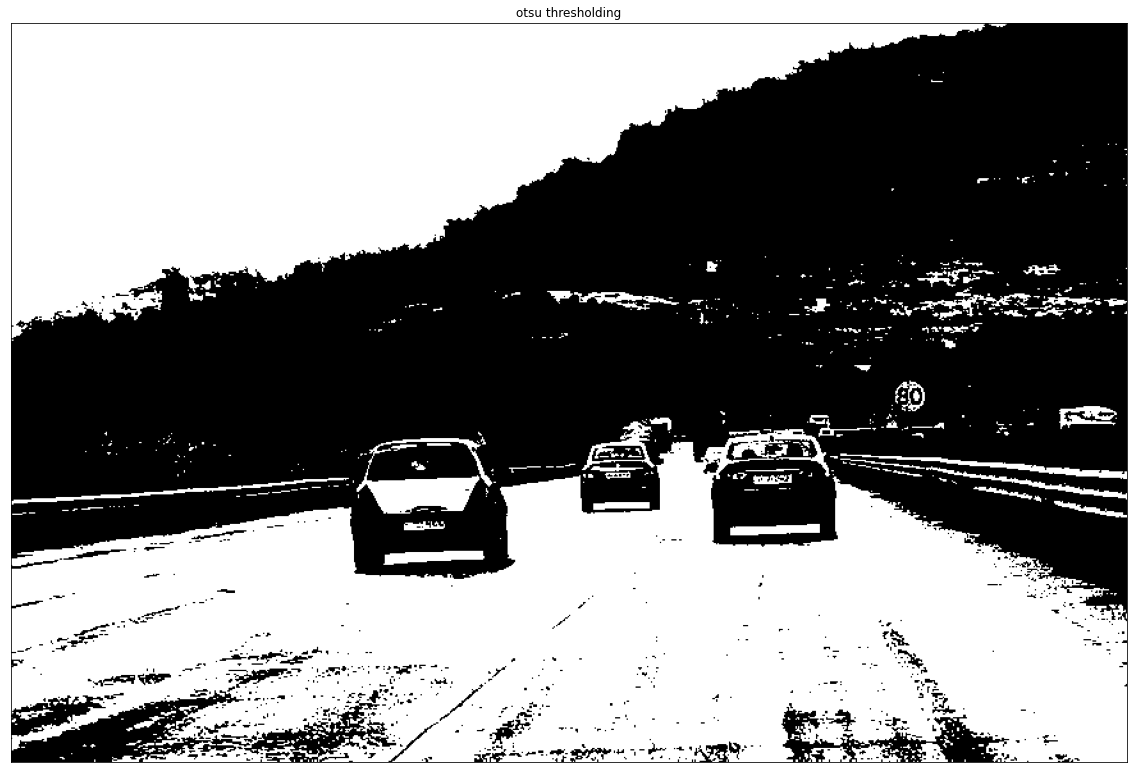

In [6]:
ret2,th1 = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(20,20))
plt.imshow(th1,'gray')
plt.title('otsu thresholding')
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text major ticklabel objects>)

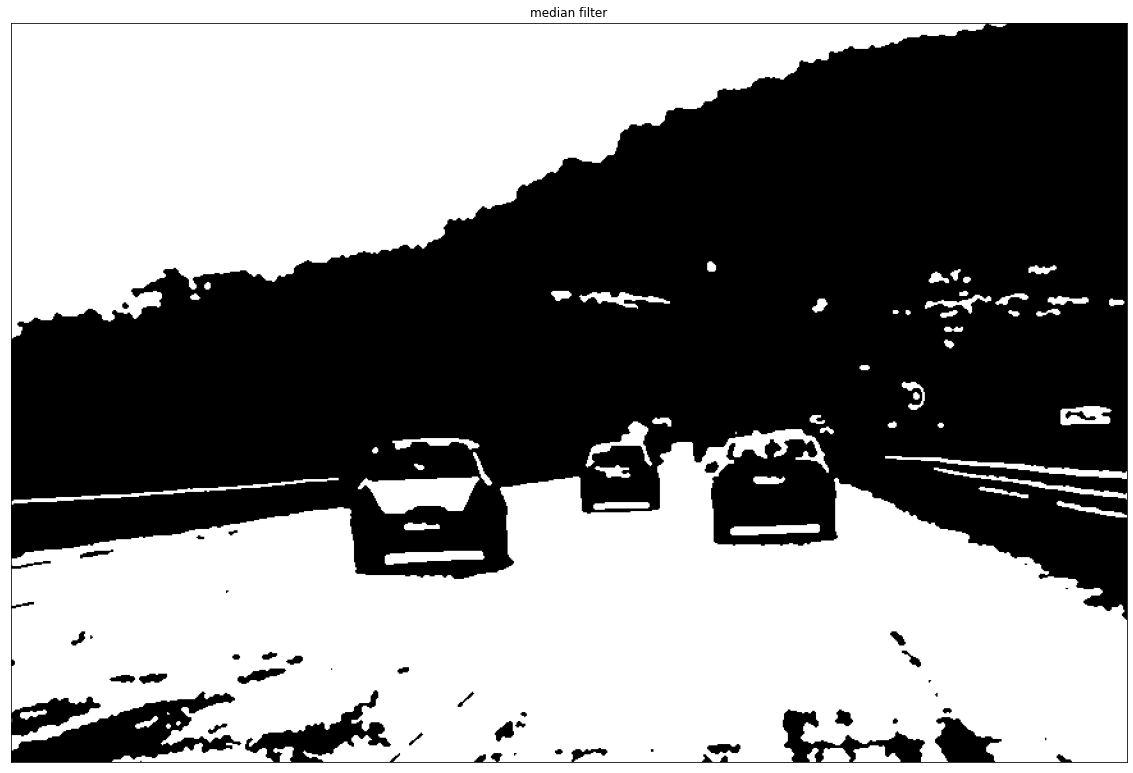

In [7]:
median1 = cv2.medianBlur(th1,3)
for i in range(5):
 median1 = cv2.medianBlur(median1,3)
plt.figure(figsize=(20,20))
plt.imshow(median1,'gray')
plt.title('median filter')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

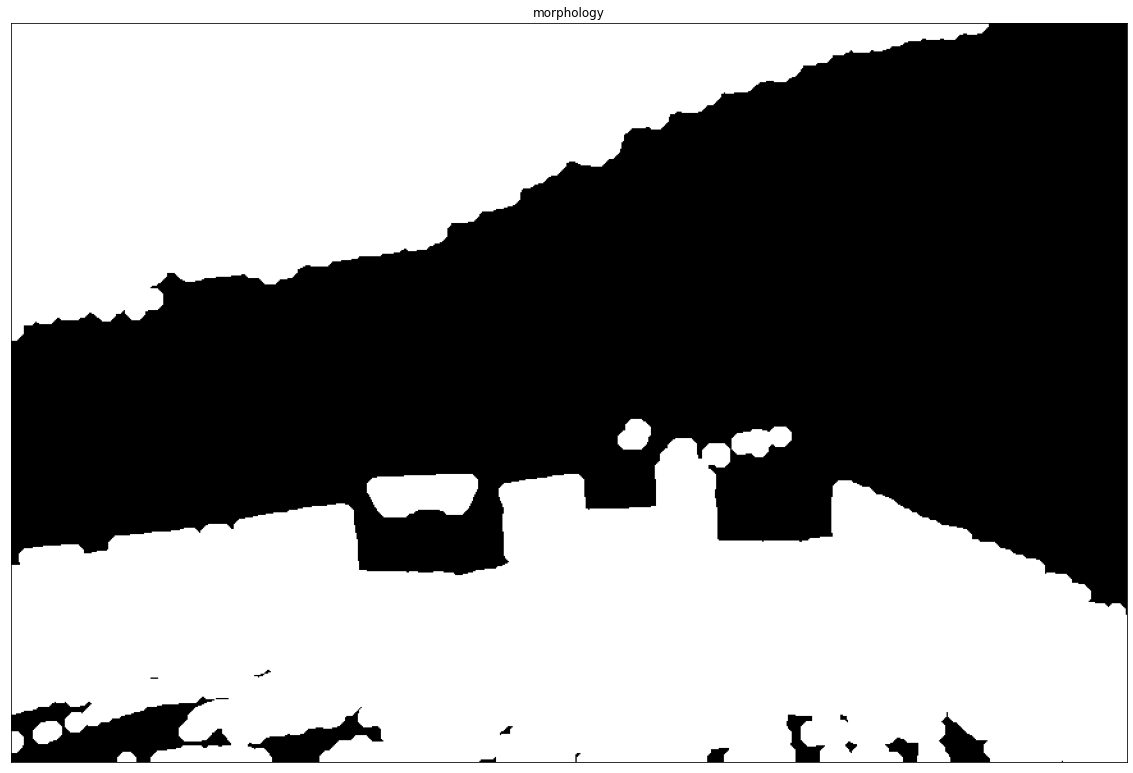

In [8]:
kernel1=np.array([[0,0,1,1,1,1,1,0,0],[0,1,1,1,1,1,1,1,0],[1,1,1,1,1,1,1,1,1],[1,1,1,1,
1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[0,1,1,1,1,1,1,1,0
],[0,0,1,1,1,1,1,0,0]],dtype=np.uint8)
kernel2=np.array([[0,0,0,0,1,1,1,1,1,1,1,0,0,0,0],[0,0,0,1,1,1,1,1,1,1,1,1,0,0,0],[0,0,
1,1,1,1,1,1,1,1,1,1,1,0,0],[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,
1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1
,1,1,1,1,1,1,1],[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],[0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],[0,0,0,1,
1,1,1,1,1,1,1,1,0,0,0],[0,0,0,0,1,1,1,1,1,1,1,0,0,0,0]],dtype=np.uint8)


img_erosion = cv2.erode(median1, kernel1, iterations=1)
img_dilation = cv2.dilate(img_erosion , kernel2, iterations=1)
plt.figure(figsize=(20,20))
plt.imshow(img_dilation,'gray')
plt.title('morphology')
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text major ticklabel objects>)

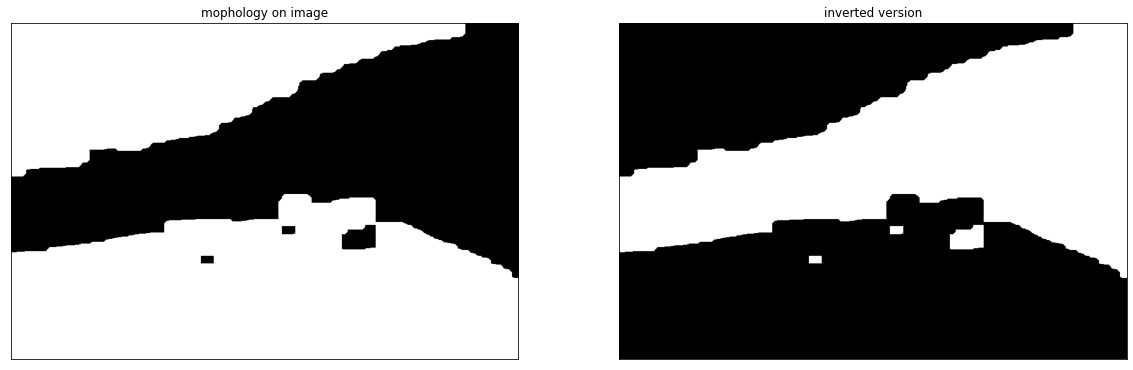

In [16]:
# kernel1=np.array([[0,0,1,1,1,1,1,0,0],[0,1,1,1,1,1,1,1,0],[1,1,1,1,1,1,1,1,1],[1,1,1,1,
# 1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1],[0,1,1,1,1,1,1,1,0
# ],[0,0,1,1,1,1,1,0,0]],dtype=np.uint8)


median2 = cv2.medianBlur(img_dilation,3)
for i in range(10):
 median2 = cv2.medianBlur(median2,3)
img_new1=median2
 
kernel3= np.ones((15,15), np.uint8)
img= cv2.dilate(img_new1 , kernel3, iterations=3)
kernel4= np.ones((5, 5), np.uint8)
img1=cv2.erode(img , kernel4, iterations=3)
kernel5= np.ones((14, 14), np.uint8)
img2= cv2.dilate(img1 , kernel5, iterations=1)
img3=cv2.erode(img2 , kernel4, iterations=3)
img4=255-img3
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img3,'gray')
plt.title('mophology on image')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img4,'gray')
plt.title('inverted version')
plt.xticks([])
plt.yticks([])

area of the regions detected in decreasing order are [308292, 193108, 2011, 319, 286]
total pixels in image 504016
approximate cars in image are 3


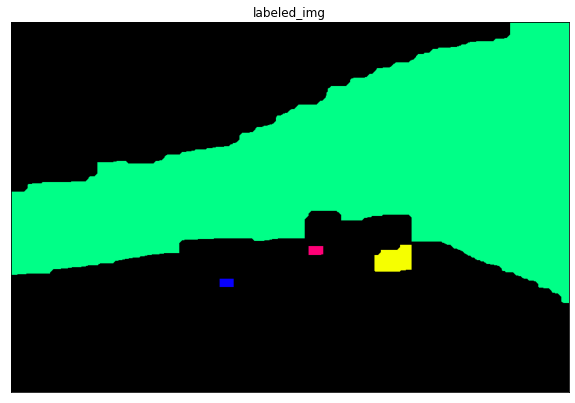

In [17]:
con=8
output= cv2.connectedComponentsWithStats(img4,con,cv2.CV_32S)
num_labels = output[0]
labels_im= output[1]
stats=output[2]
tot_area=0
count=0
area=list()
for i in range(0,num_labels):
 area.append(stats[i, cv2.CC_STAT_AREA])
print('area of the regions detected in decreasing order are',area)
 
for k in range(0,num_labels):
 tot_area=tot_area+area[k]
print('total pixels in image',tot_area)
for i in range(0,num_labels):
 if area[i]<= 0.02*tot_area:
    count=count+1
 
#num_labels, labels_im = cv2.connectedComponents(img4)
#print('total regions detected are',num_labels)
print('approximate cars in image are',count)
def imshow_components(labels):
 # Map component labels to hue val
 label_hue = np.uint8(179*labels/np.max(labels))
 blank_ch = 255*np.ones_like(label_hue)
 labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
 # cvt to BGR for display
 labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
 # set bg label to black
 labeled_img[label_hue==0] = 0
 plt.figure(figsize=(10,10))
 plt.imshow(labeled_img,'gray')
 plt.title('labeled_img')
 plt.xticks([])
 plt.yticks([])
imshow_components(labels_im)


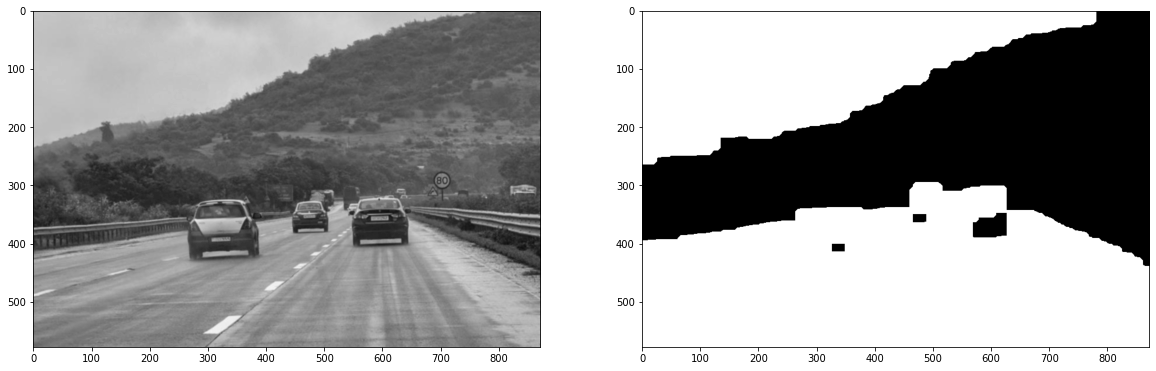

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img_gray,cmap='gray', interpolation = 'bicubic')
plt.subplot(1,2,2)
plt.imshow(img3,'gray')


In [14]:
# To see structure of kernel in shape of disk
import numpy as np
my_array = np.array([[0,0,0,0,1,1,1,1,1,1,1,0,0,0,0],[0,0,0,1,1,1,1,1,1,1,1,1,0,0,0],[0,0,1,1,1,1,1,
1,1,1,1,1,1,0,0],[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1
,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1,1,1,1
,1,1],[0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],[0,0,1,1,1,1,1,1,1,1,1,1,1,0,0],[0,0,0,1,1,1,1,1,1,
1,1,1,0,0,0],[0,0,0,0,1,1,1,1,1,1,1,0,0,0,0]], dtype=np.uint8)
print(my_array)

[[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 0 0 0 0]]


([], <a list of 0 Text major ticklabel objects>)

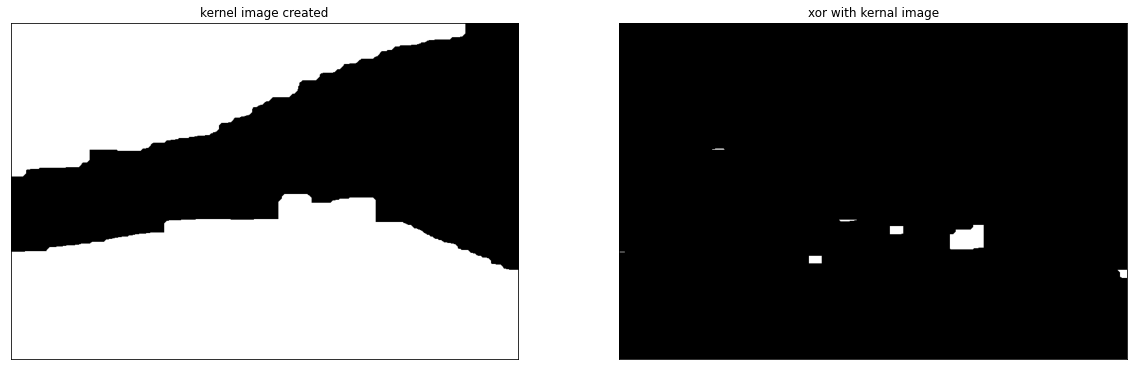

In [15]:
# kernel image created with repeated erosion dilation and then its xor is calculated with 
#region segmented image(to eliminated all background)
kernel_image1=cv2.dilate(img3,kernel4, iterations=8)
kernel_image2=cv2.erode(kernel_image1 ,kernel4, iterations=8)
out_xor= cv2.bitwise_xor(kernel_image2, img3)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(kernel_image2,'gray')
plt.title('kernel image created')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(out_xor,'gray')
plt.title('xor with kernal image')
plt.xticks([])
plt.yticks([])